In [1]:
pip install pandas mysql-connector-python sqlalchemy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


<h1>Question 2</h1>

2. Average Order Value (AOV) Over Time (Monthly Trend) Scenario: The Sales Team wants to track how the Average Order Value (AOV) has changed month over month in 2022. Requirements: • Create a line chart that shows the AOV trend over time. • Use the formula SUM(after_discount) / COUNT_DISTINCT(id) to calculate AOV. • Filter the data for the year 2022 and group by month. • Display the AOV trend for each month. Key Features to Use: • order_date (for time-based grouping) • after_discount • id

In [8]:
import pandas as pd
import mysql.connector

# Database Connection
conn = mysql.connector.connect(
    host="localhost",      # e.g., "localhost" or "your_server_ip"
    user="root",      # e.g., "root"
    password="12345",
    database="sales"
)

# Query to Calculate Monthly AOV
query = """
SELECT 
    DATE_FORMAT(order_date, '%Y-%m') AS month,
    SUM(after_discount) / COUNT(DISTINCT id) AS AOV
FROM order_detail
WHERE YEAR(order_date) = 2022
GROUP BY month
ORDER BY month;
"""

# Load Data into Pandas DataFrame
df = pd.read_sql(query, conn)
conn.close()

print(df.head())  # Preview Data


     month           AOV
0  2022-01  1.128262e+06
1  2022-02  1.076605e+06
2  2022-03  1.279080e+06
3  2022-04  1.851342e+06
4  2022-05  1.350980e+06


C:\Users\Dilshad\AppData\Local\Temp\ipykernel_7820\2930173771.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


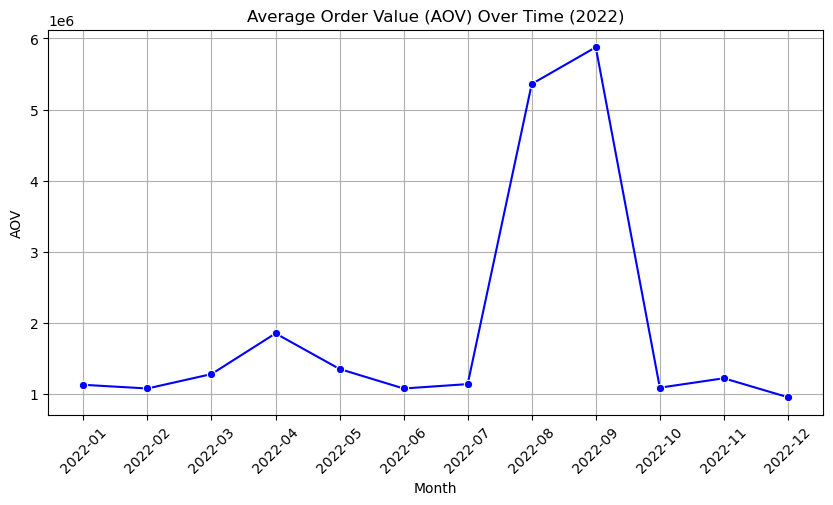

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Figure Size
plt.figure(figsize=(10, 5))

# Line Plot for AOV Trend
sns.lineplot(data=df, x="month", y="AOV", marker="o", linestyle="-", color="b")

# Customize Plot
plt.title("Average Order Value (AOV) Over Time (2022)")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.grid(True)

# Show Plot
plt.show()


In [7]:
import os
# Define the folder path and DataFrame
folder_path = r"C:\\Users\\Dilshad\\Downloads\\Google Looker project\\AOV2023"
file_path = os.path.join(folder_path, "finaldatabase.csv")

# Ensure the folder exists; create it if it doesn't
os.makedirs(folder_path, exist_ok=True)


# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")


File successfully saved to C:\\Users\\Dilshad\\Downloads\\Google Looker project\\AOV2023\finaldatabase.csv
